In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
path = '/Users/sdale/repos/find_my_tie/dataset_v0/51fYgoOqgiL._AC_SX679_.jpg'

In [4]:
img = cv2.imread(path)

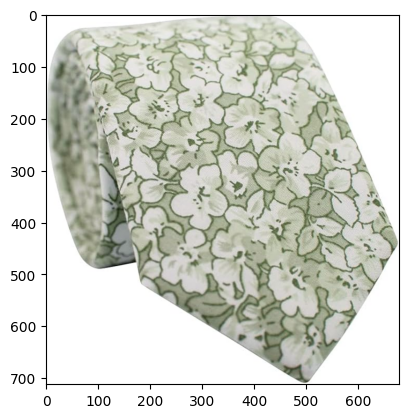

In [5]:
plt.imshow(img)

In [22]:
import numpy as np
feat = np.zeros((img.shape[0], img.shape[1], 5))
feat[:,:,:3] = img
for j in range(img.shape[0]):
    feat[j,:,3] = j/(img.shape[0]/2)
for i in range(img.shape[1]):
    feat[:,i,4] = i/(img.shape[1]/2)

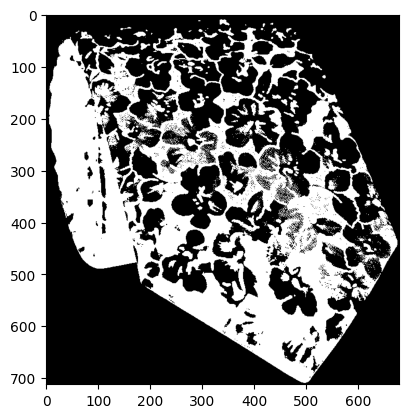

In [23]:
# let's use k-means to separate the foreground from the background
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
# add axis for row and column position to image data, so we'll have 5 channels now
feat = feat.reshape(-1, 5)
model.fit(feat)
out = model.predict(feat)
out = out.reshape(img.shape[:2])
plt.imshow(out, cmap='gray')